In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import dfm_tools as dfmt
import contextily as ctx

In [4]:

dir_testinput = os.path.join(r'n:\Deltabox\Bulletin\veenstra\info dfm_tools\test_input')
file_nc_his = os.path.join(dir_testinput,'DFM_sigma_curved_bend','DFM_OUTPUT_cb_3d','cb_3d_his.nc')
#file_nc_map = os.path.join(dir_testinput,'DFM_sigma_curved_bend','DFM_OUTPUT_cb_3d','cb_3d_map.nc')
file_nc_map = 'http://opendap.deltares.nl/thredds/dodsC/opendap/deltares/Delft3D/netcdf_example_files/westernscheldt_sph_map.nc'

data_xr_his = xr.open_mfdataset(file_nc_his, preprocess=dfmt.preprocess_hisnc)
stations_pd = data_xr_his['stations'].to_dataframe()
print(stations_pd)
#data_xr_map = xr.open_dataset(file_nc_map)


                     station_x_coordinate  station_y_coordinate  \
stations                                                          
Innersouth boundary            861.509098            227.265206   
Outersouth boundary            287.922363            300.489045   
Innereast boundary            3851.482506           3314.870398   
Outereast boundary            3802.666613           3876.253160   
Mid inner area                1715.787215           2155.492954   
Mid outer area                1239.832264           2619.243932   

                                stations  
stations                                  
Innersouth boundary  Innersouth boundary  
Outersouth boundary  Outersouth boundary  
Innereast boundary    Innereast boundary  
Outereast boundary    Outereast boundary  
Mid inner area            Mid inner area  
Mid outer area            Mid outer area  


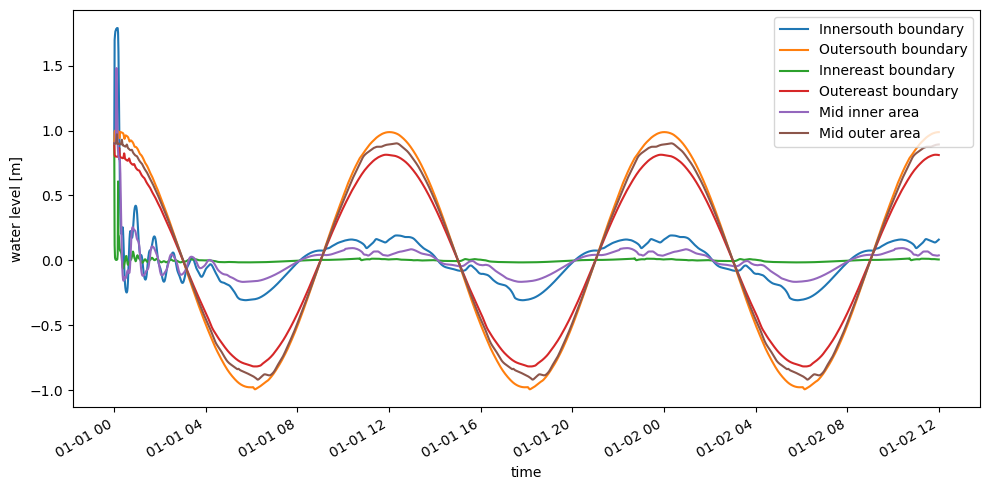

In [7]:
#retrieve his data and plot
fig, ax = plt.subplots(1,1,figsize=(10,5))
data_xr_his.waterlevel.plot.line(ax=ax, x='time')
ax.legend(data_xr_his.stations.to_series(),loc=1) #optional, to change legend location
fig.tight_layout()


processing 1 partitions (first getting max number of facenodes)
processing netdata from domain 0000 of 0000


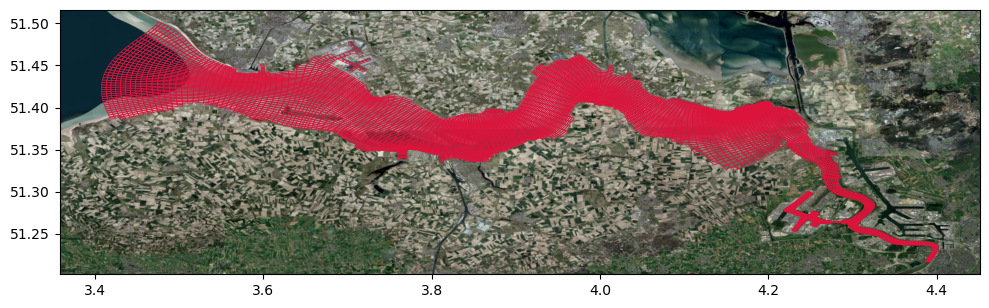

In [8]:
#plot net/grid
ugrid_all = dfmt.get_netdata(file_nc=file_nc_map)#,multipart=False)
fig, ax = plt.subplots(figsize=(10,4))
pc = dfmt.plot_netmapdata(ugrid_all.verts, values=None, ax=None, linewidth=0.5, color="crimson", facecolor="None")
ctx.add_basemap(ax=ax, source=ctx.providers.Esri.WorldImagery, crs="EPSG:4326", attribution=False)
fig.tight_layout()


varname: mesh2d_s1  (25, 8355)  ('time', 'nmesh2d_face'), coordinates=(mesh2d_face_x mesh2d_face_y)


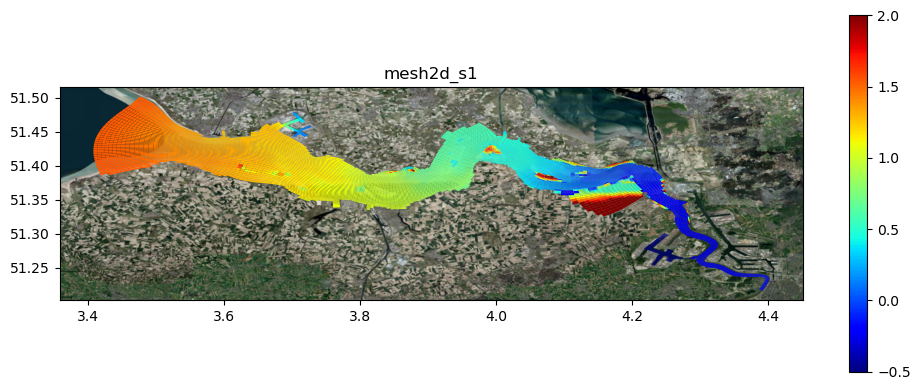

In [9]:

#plot water level on map
data_frommap_wl = dfmt.get_ncmodeldata(file_nc=file_nc_map, varname='mesh2d_s1', timestep=10)#, multipart=False)
fig, ax = plt.subplots(figsize=(10,4))
pc = dfmt.plot_netmapdata(ugrid_all.verts, values=data_frommap_wl[0,:], ax=None, linewidth=0.5, cmap="jet")
pc.set_clim([-0.5,2])
fig.colorbar(pc, ax=ax)
ax.set_title(data_frommap_wl.var_varname)
ctx.add_basemap(ax=ax, source=ctx.providers.Esri.WorldImagery, crs="EPSG:4326", attribution=False)
fig.tight_layout()


varname: mesh2d_ucx  (25, 8355)  ('time', 'nmesh2d_face'), coordinates=(mesh2d_face_x mesh2d_face_y)


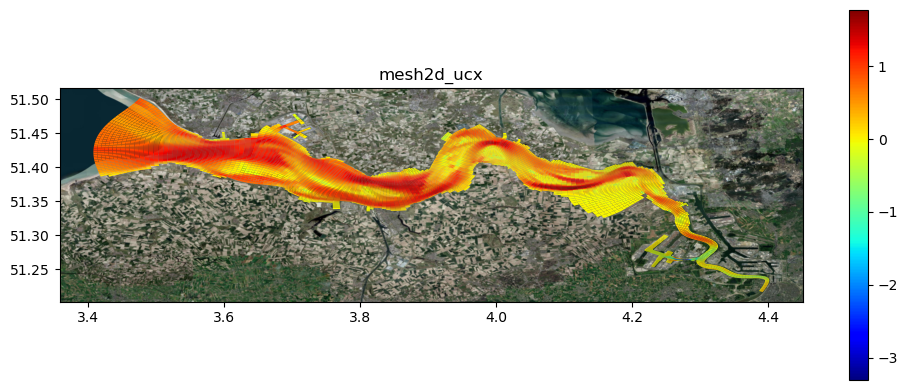

In [10]:
#plot salinity on map
data_frommap_sal = dfmt.get_ncmodeldata(file_nc=file_nc_map, varname='mesh2d_ucx', timestep=10)#, layer=5)#, multipart=False) #was 3D mesh2d_sa1 variable for curvibend
fig, ax = plt.subplots(figsize=(10,4))
pc = dfmt.plot_netmapdata(ugrid_all.verts, values=data_frommap_sal[0,:], ax=None, linewidth=0.5, cmap="jet")
fig.colorbar(pc, ax=ax)
ax.set_title(data_frommap_sal.var_varname)
ctx.add_basemap(ax=ax, source=ctx.providers.Esri.WorldImagery, crs="EPSG:4326", attribution=False)
fig.tight_layout()